In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [9]:
df=pd.read_csv("Tree_Data.csv")
df

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,40.89,NaN,0.83,9.15,11.88,16,56.0,1.0,NaN,NaN
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0,NaN,NaN
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0,NaN,NaN
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


In [10]:
df.isna().sum()


,0
No,0
Plot,0
Subplot,0
Species,0
Light_ISF,0
Light_Cat,0
Core,0
Soil,0
Adult,0
Sterile,0


In [11]:
df.dtypes

,0
No,int64
Plot,int64
Subplot,object
Species,object
Light_ISF,float64
Light_Cat,object
Core,int64
Soil,object
Adult,object
Sterile,object


In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])



Correlation Matrix:
                   No      Plot   Subplot   Species  Light_ISF  Light_Cat  \
No           1.000000  0.998450  0.031203  0.017094   0.250086  -0.552409   
Plot         0.998450  1.000000  0.009240  0.017046   0.248232  -0.558274   
Subplot      0.031203  0.009240  1.000000  0.012735   0.093429   0.006648   
Species      0.017094  0.017046  0.012735  1.000000   0.002803  -0.041206   
Light_ISF    0.250086  0.248232  0.093429  0.002803   1.000000  -0.137105   
Light_Cat   -0.552409 -0.558274  0.006648 -0.041206  -0.137105   1.000000   
Core         0.040238  0.037724  0.041151  0.113079   0.049650   0.010786   
Soil        -0.006812 -0.006010  0.014279  0.032038  -0.005859  -0.013540   
Adult       -0.010607 -0.011630  0.025774  0.025642  -0.002551   0.020273   
Sterile     -0.010214 -0.010690  0.024135  0.033909  -0.011713   0.012024   
Conspecific -0.014064 -0.013939 -0.012836  0.027049  -0.018339   0.016127   
Myco         0.015139  0.015163  0.011524  0.891806   0

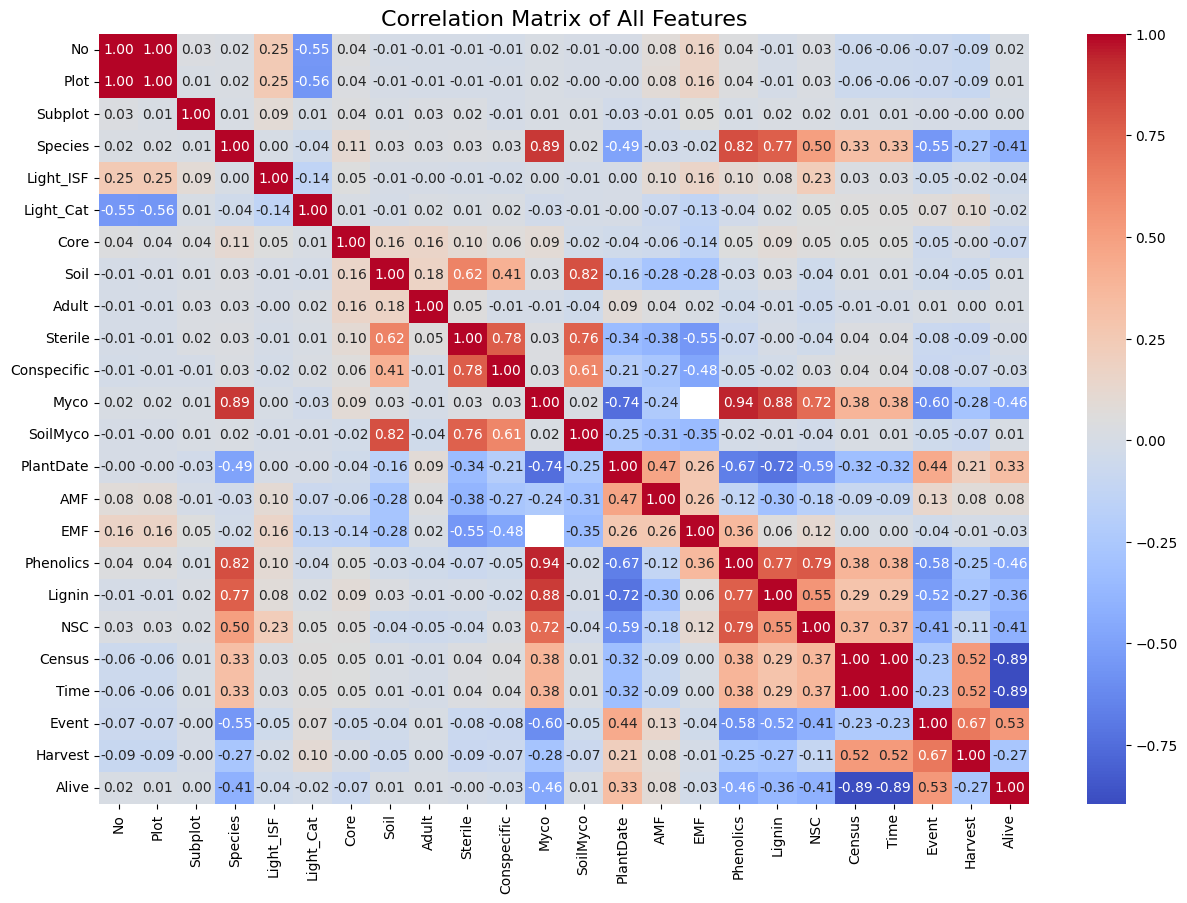

In [13]:
corr_matrix = df.corr()

# Display numerical correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of All Features", fontsize=16)
plt.show()

In [14]:
df.drop(["EMF", "Harvest", "Alive", "Adult","PlantDate"], axis=1, inplace=True)

In [15]:
lst=["Species","Subplot","Light_Cat","Soil","Sterile","Conspecific","Myco","SoilMyco"]
le=LabelEncoder()
for i in lst:
    df[i]=le.fit_transform(df[i])

In [16]:
df.dtypes

,0
No,int64
Plot,int64
Subplot,int64
Species,int64
Light_ISF,float64
Light_Cat,int64
Core,int64
Soil,int64
Sterile,int64
Conspecific,int64


In [17]:
df.isna().sum()

,0
No,0
Plot,0
Subplot,0
Species,0
Light_ISF,0
Light_Cat,0
Core,0
Soil,0
Sterile,0
Conspecific,0


In [18]:
df.dropna(inplace=True)

In [19]:
df

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event
0,126,1,2,0,0.106,2,2017,3,0,1,0,0,22.00,-0.56,13.86,12.15,4,14.0,1.0
1,11,1,2,2,0.106,2,2017,5,0,1,1,1,15.82,5.19,20.52,19.29,33,115.5,0.0
2,12,1,2,3,0.106,2,2017,3,0,1,1,0,24.45,3.36,24.74,15.01,18,63.0,1.0
3,2823,7,3,0,0.080,2,2016,3,0,1,0,0,22.23,-0.71,14.29,12.36,4,14.0,1.0
4,5679,14,0,0,0.060,1,2017,3,0,1,0,0,21.15,-0.58,10.85,11.20,4,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,7086,17,2,2,0.122,0,2017,5,0,1,1,1,10.89,5.53,21.44,18.99,16,56.0,1.0
2778,7165,17,1,1,0.111,2,2017,2,0,1,0,1,40.89,0.83,9.15,11.88,16,56.0,1.0
2779,7217,17,3,2,0.118,2,2017,0,0,1,1,0,15.47,4.88,19.01,23.50,16,56.0,1.0
2780,7306,17,3,2,0.118,2,2017,5,0,1,1,1,11.96,5.51,21.13,19.10,16,56.0,1.0


In [20]:
x=df.drop(["Sterile"],axis=1)
x

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event
0,126,1,2,0,0.106,2,2017,3,1,0,0,22.00,-0.56,13.86,12.15,4,14.0,1.0
1,11,1,2,2,0.106,2,2017,5,1,1,1,15.82,5.19,20.52,19.29,33,115.5,0.0
2,12,1,2,3,0.106,2,2017,3,1,1,0,24.45,3.36,24.74,15.01,18,63.0,1.0
3,2823,7,3,0,0.080,2,2016,3,1,0,0,22.23,-0.71,14.29,12.36,4,14.0,1.0
4,5679,14,0,0,0.060,1,2017,3,1,0,0,21.15,-0.58,10.85,11.20,4,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,7086,17,2,2,0.122,0,2017,5,1,1,1,10.89,5.53,21.44,18.99,16,56.0,1.0
2778,7165,17,1,1,0.111,2,2017,2,1,0,1,40.89,0.83,9.15,11.88,16,56.0,1.0
2779,7217,17,3,2,0.118,2,2017,0,1,1,0,15.47,4.88,19.01,23.50,16,56.0,1.0
2780,7306,17,3,2,0.118,2,2017,5,1,1,1,11.96,5.51,21.13,19.10,16,56.0,1.0


In [21]:
y=df.iloc[:,8]
y

,Sterile
0,0
1,0
2,0
3,0
4,0
...,...
2777,0
2778,0
2779,0
2780,0


In [23]:
df = x
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2782
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2782 non-null   int64  
 1   Plot         2782 non-null   int64  
 2   Subplot      2782 non-null   int64  
 3   Species      2782 non-null   int64  
 4   Light_ISF    2782 non-null   float64
 5   Light_Cat    2782 non-null   int64  
 6   Core         2782 non-null   int64  
 7   Soil         2782 non-null   int64  
 8   Conspecific  2782 non-null   int64  
 9   Myco         2782 non-null   int64  
 10  SoilMyco     2782 non-null   int64  
 11  AMF          2782 non-null   float64
 12  Phenolics    2782 non-null   float64
 13  Lignin       2782 non-null   float64
 14  NSC          2782 non-null   float64
 15  Census       2782 non-null   int64  
 16  Time         2782 non-null   float64
 17  Event        2782 non-null   float64
dtypes: float64(7), int64(11)
memory usage: 413.0 KB


In [24]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index([], dtype='object')

Numerical type columns:
Index(['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core',
       'Soil', 'Conspecific', 'Myco', 'SoilMyco', 'AMF', 'Phenolics', 'Lignin',
       'NSC', 'Census', 'Time', 'Event'],
      dtype='object')


In [25]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [26]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [27]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: []
Discrete Features: ['Plot', 'Subplot', 'Species', 'Light_Cat', 'Core', 'Soil', 'Conspecific', 'Myco', 'SoilMyco', 'Census', 'Time', 'Event']
Continuous Features: ['No', 'Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC']


In [28]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Plot
[ 1  7 14  2  3  4  5  6  8  9 10 11 12 13 15 16 17 18]

Subplot
[2 3 0 1 4]

Species
[0 2 3 1]

Light_Cat
[2 1 0]

Core
[2017 2016]

Soil
[3 5 0 2 6 1 4]

Conspecific
[1 2 0]

Myco
[0 1]

SoilMyco
[0 1 2]

Census
[ 4 33 18  7 21 17 19 20 27 23 24 25 22  8  9 10 11 12 13 14 15 16]

Time
[ 14.  115.5  63.   24.5  73.5  59.5  66.5  70.   94.5  80.5  84.   87.5
  77.   28.   31.5  35.   38.5  42.   45.5  49.   52.5  56. ]

Event
[1. 0.]



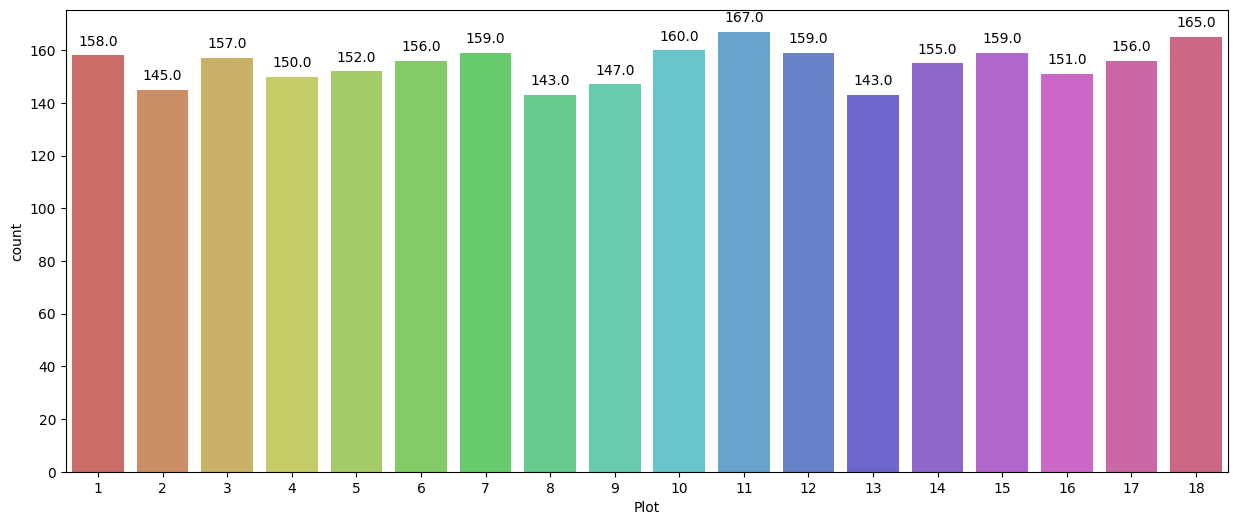

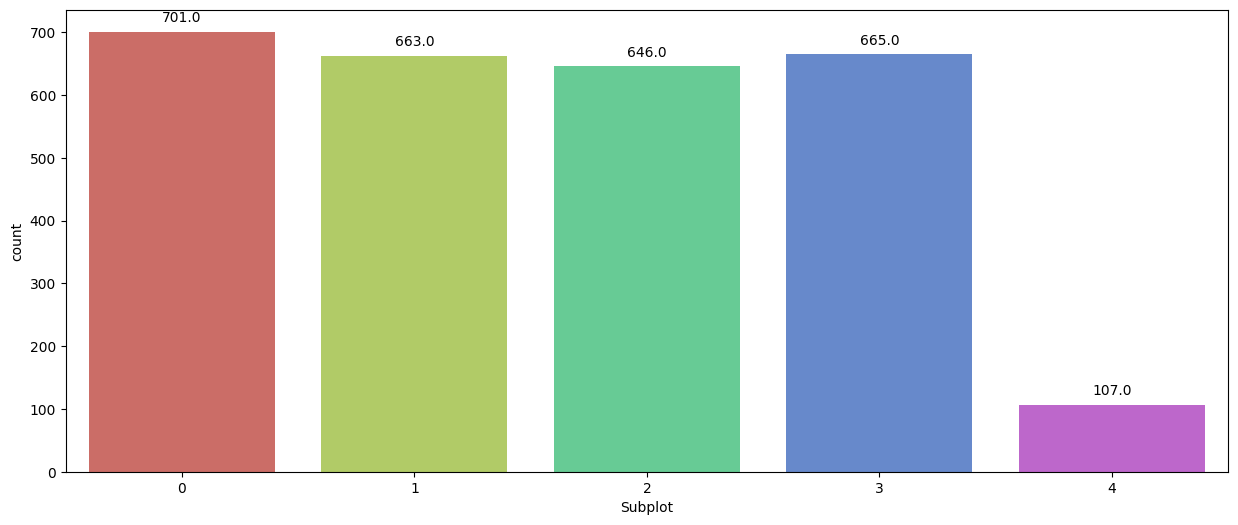

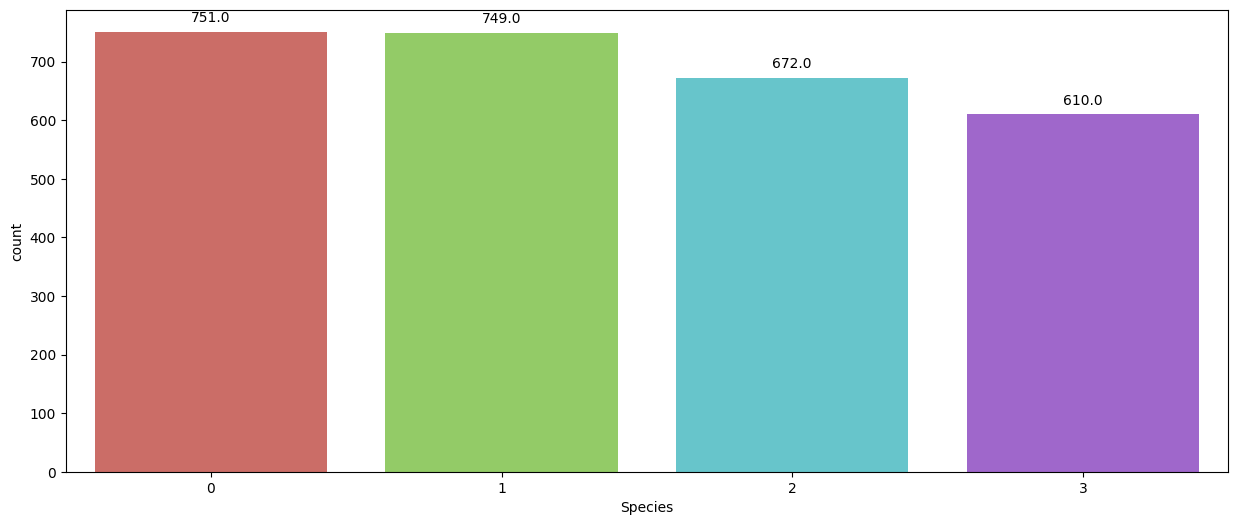

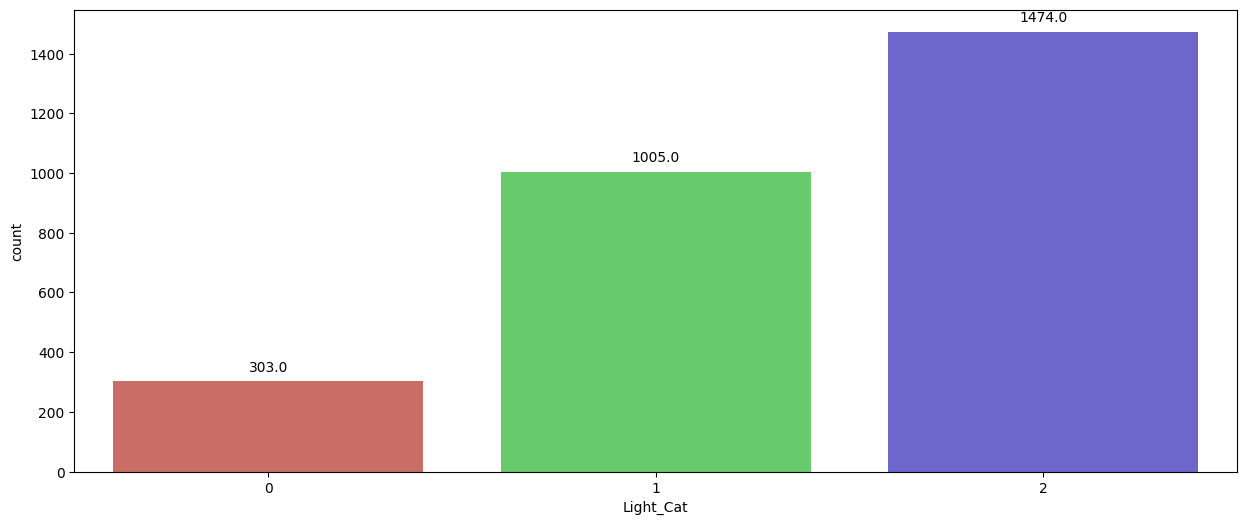

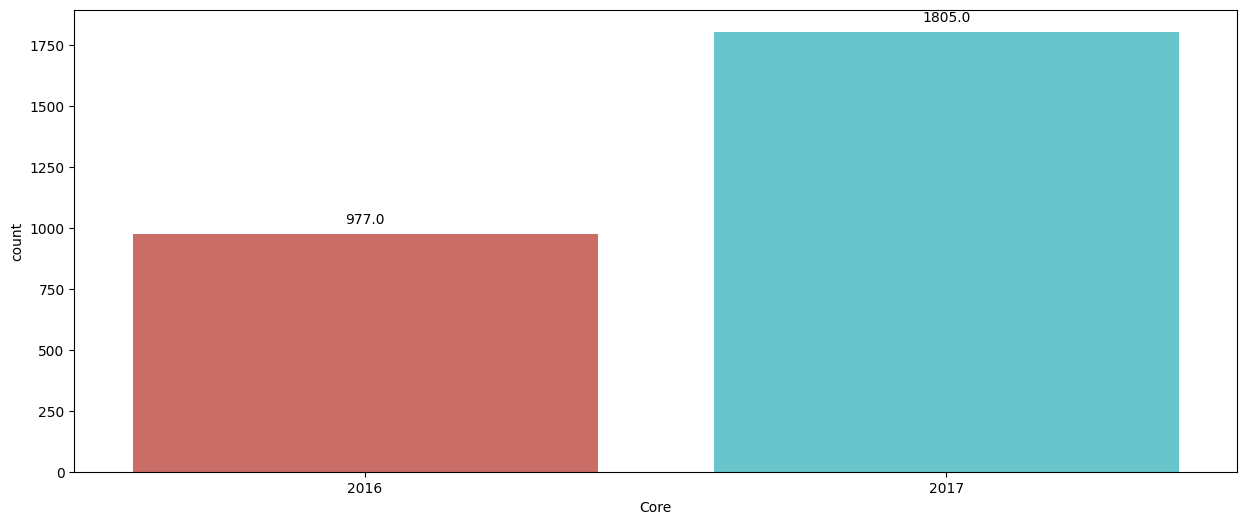

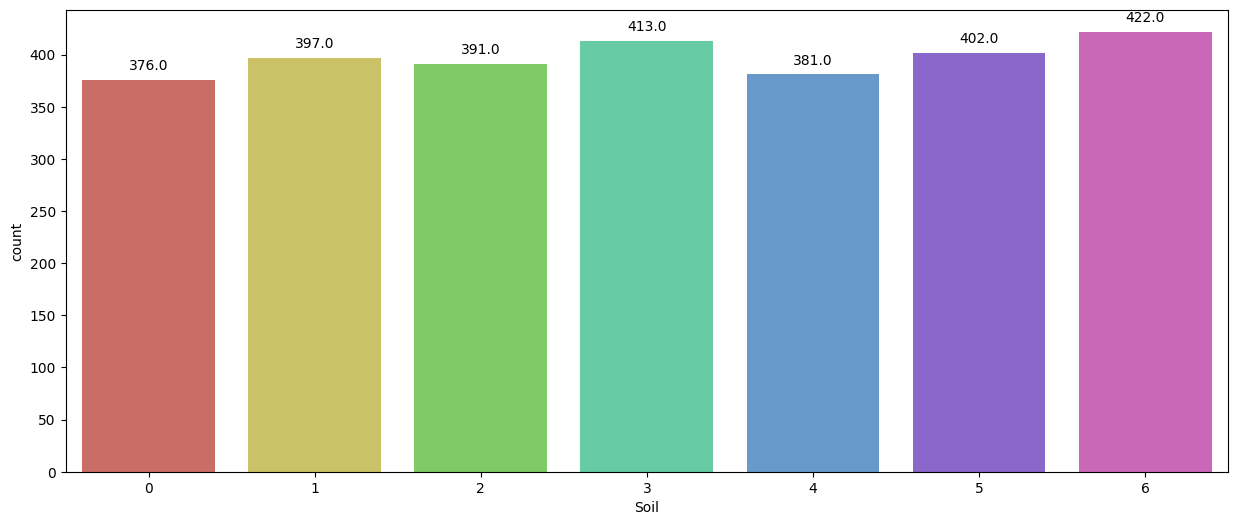

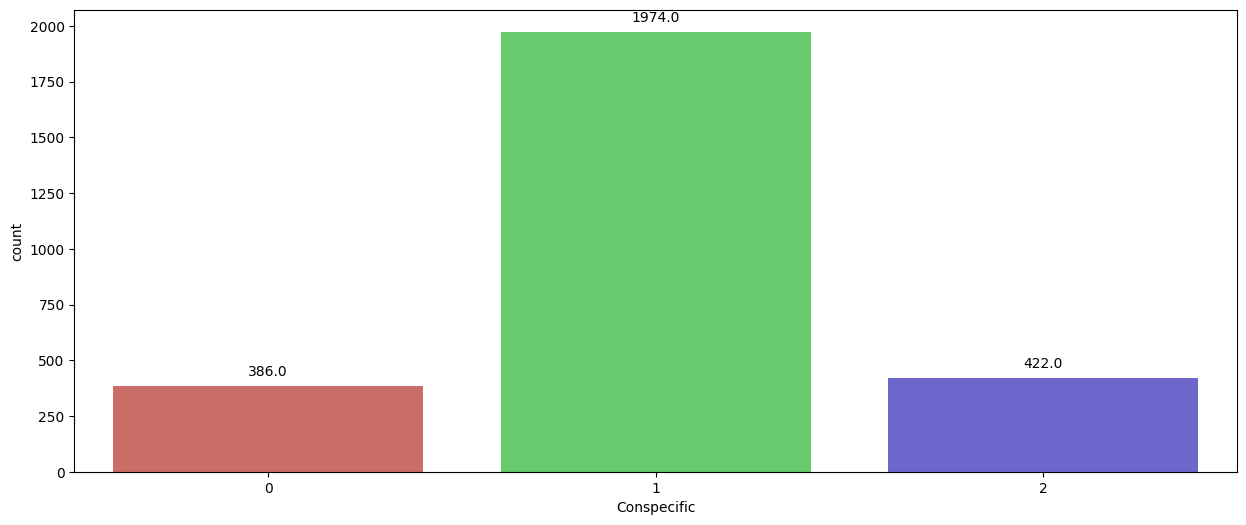

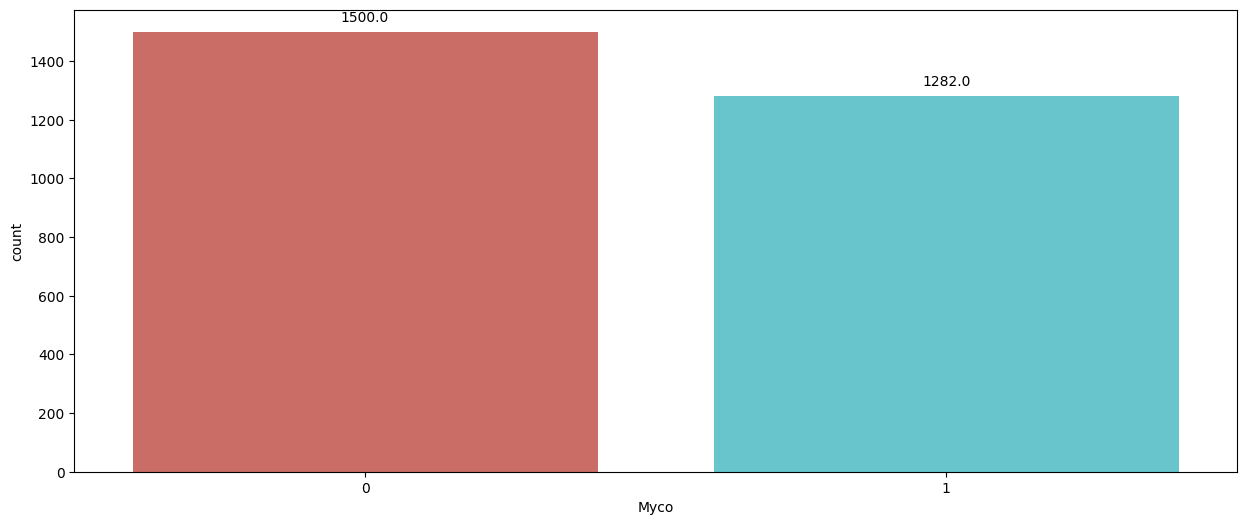

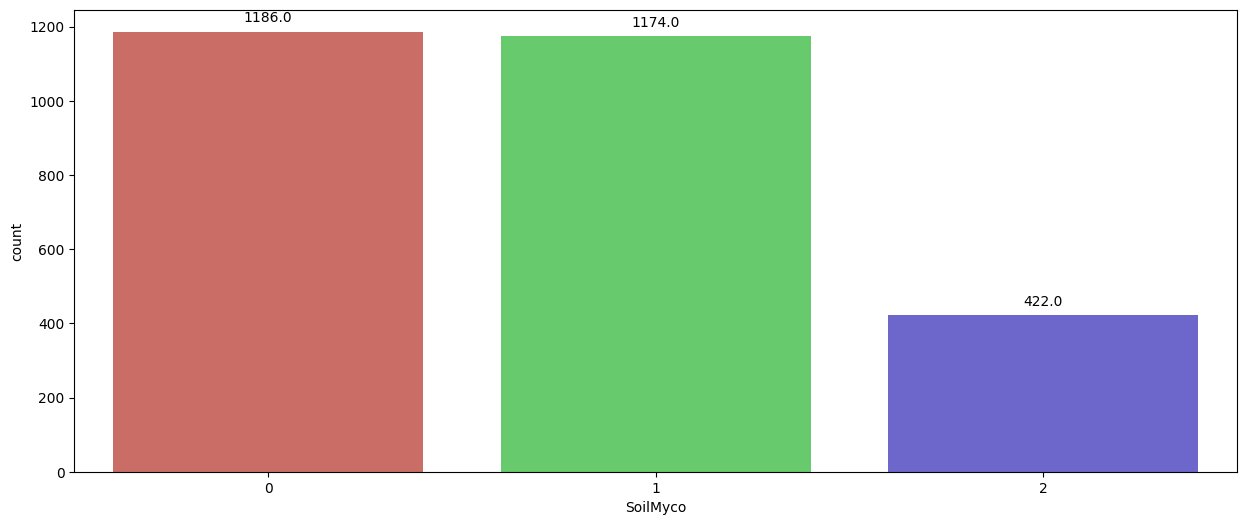

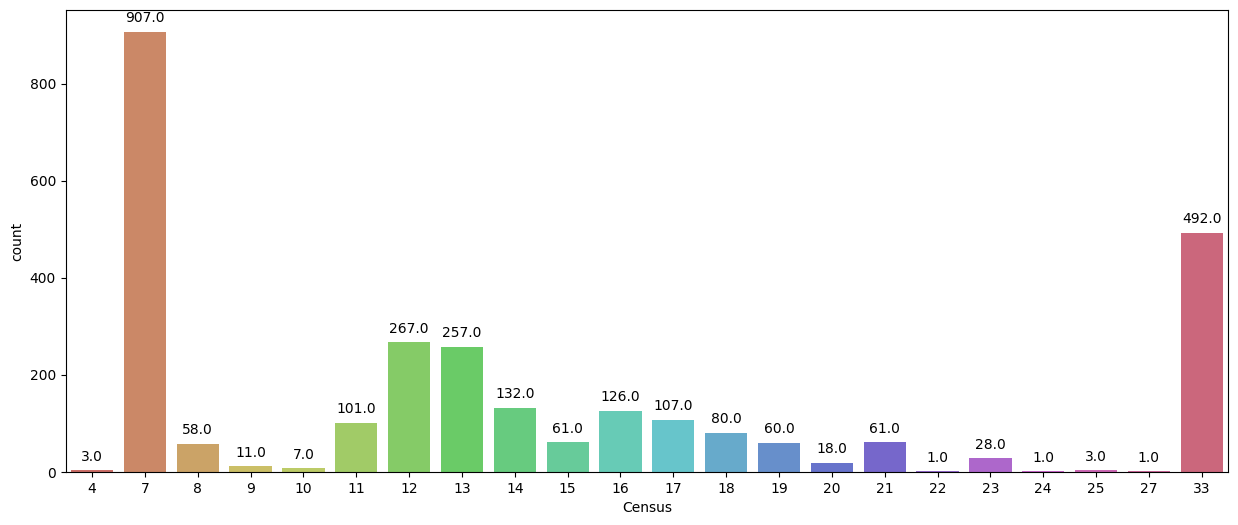

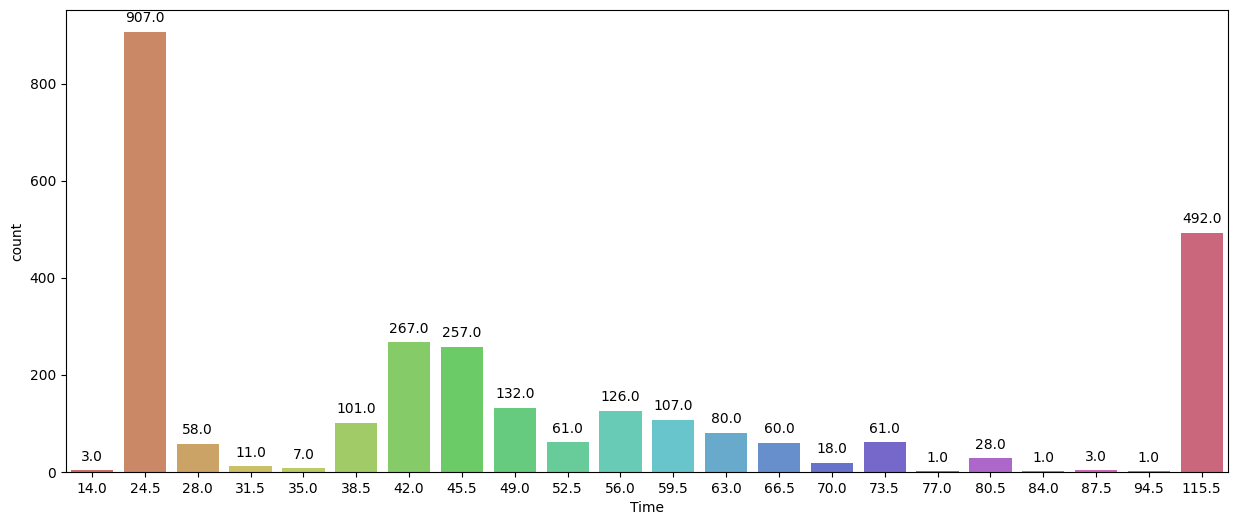

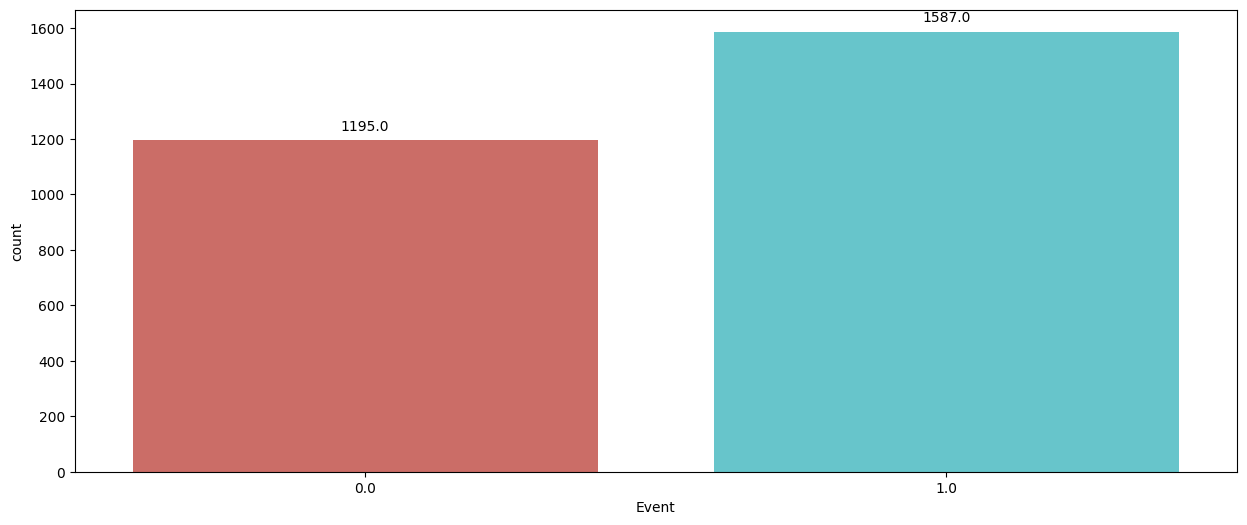

In [29]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [30]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [31]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

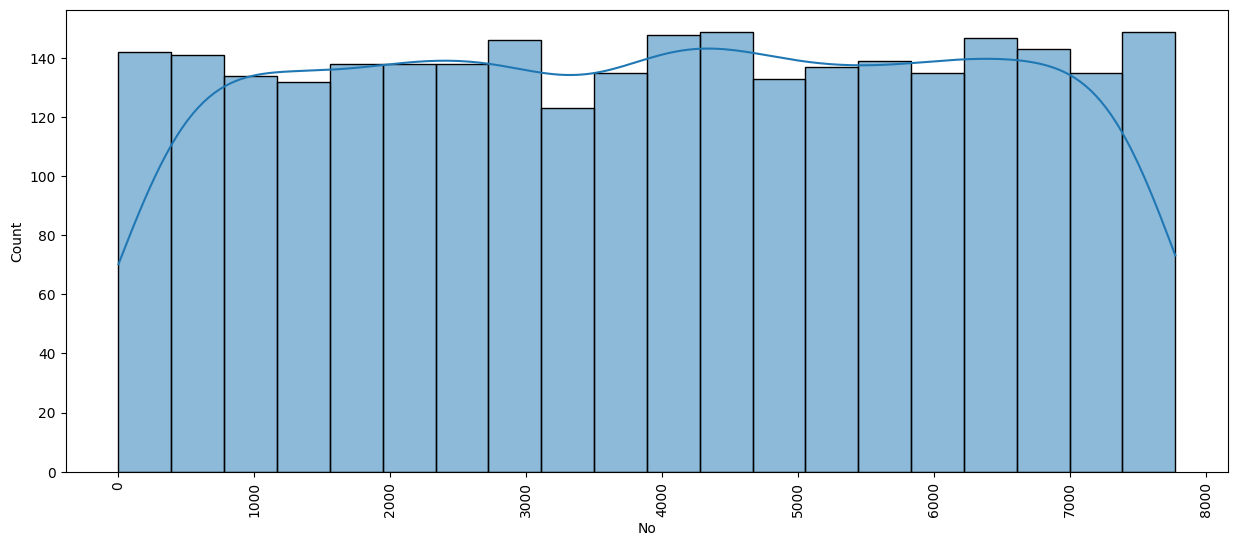

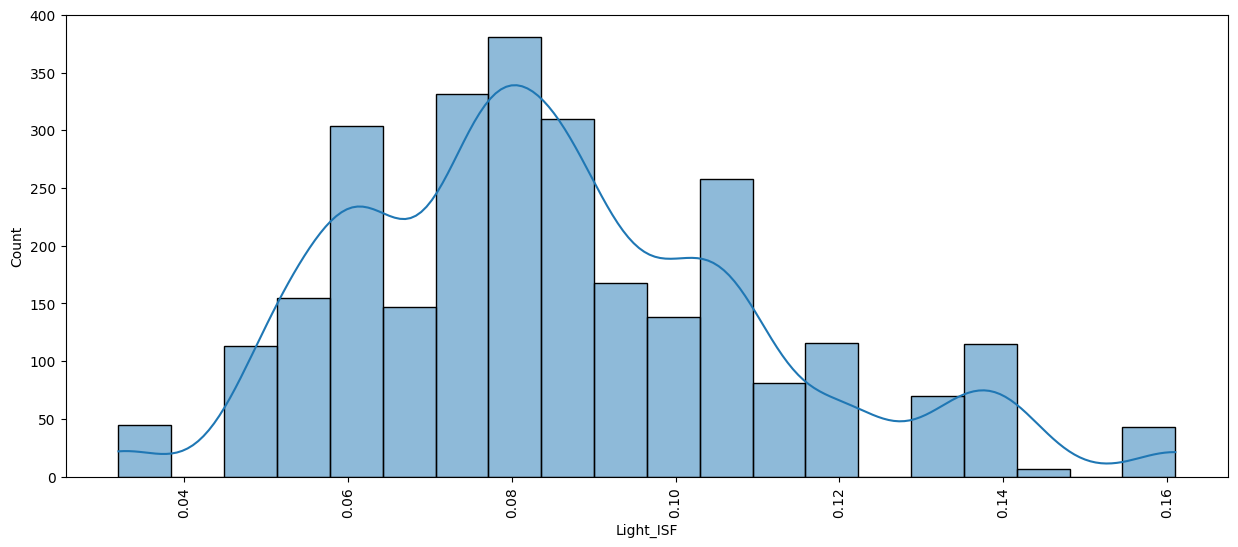

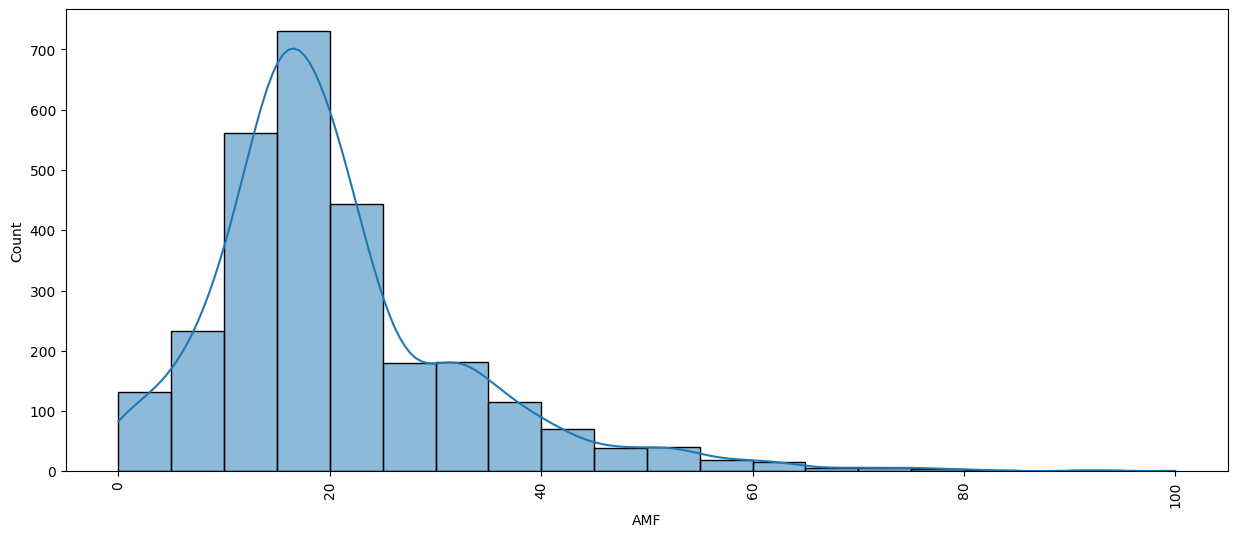

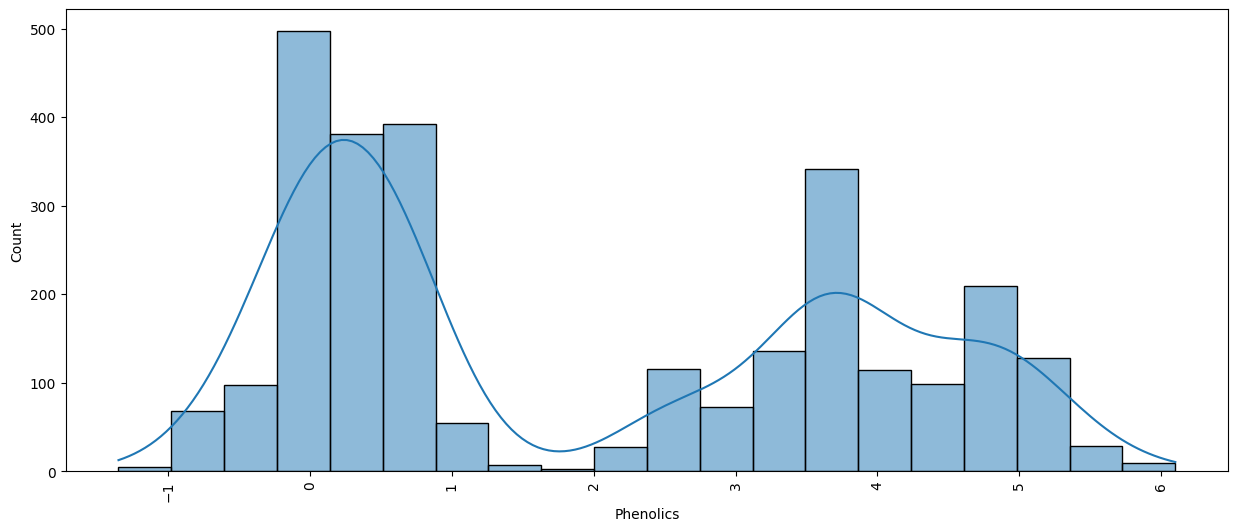

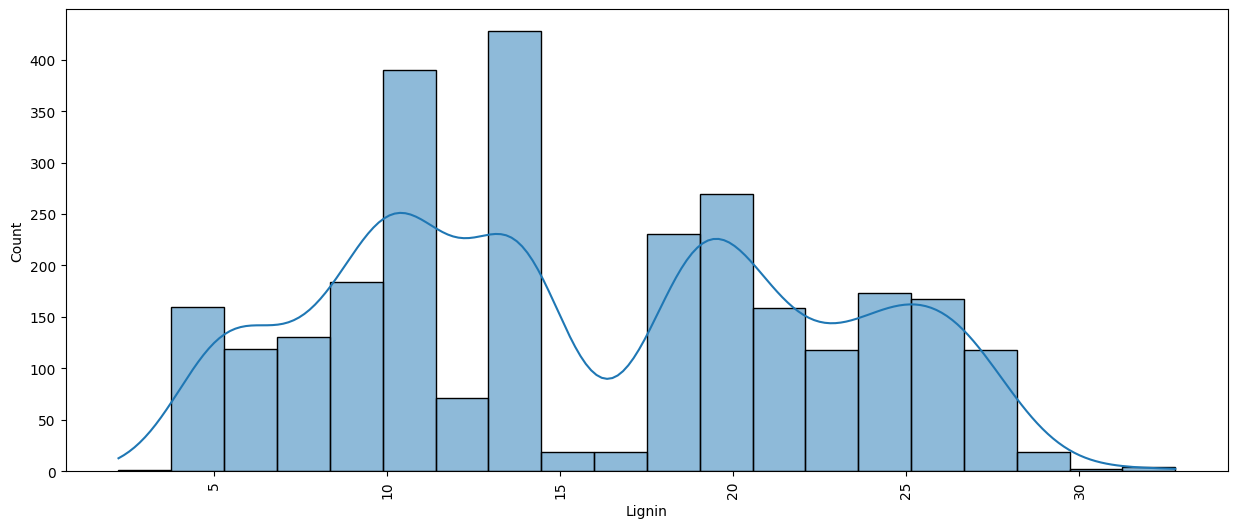

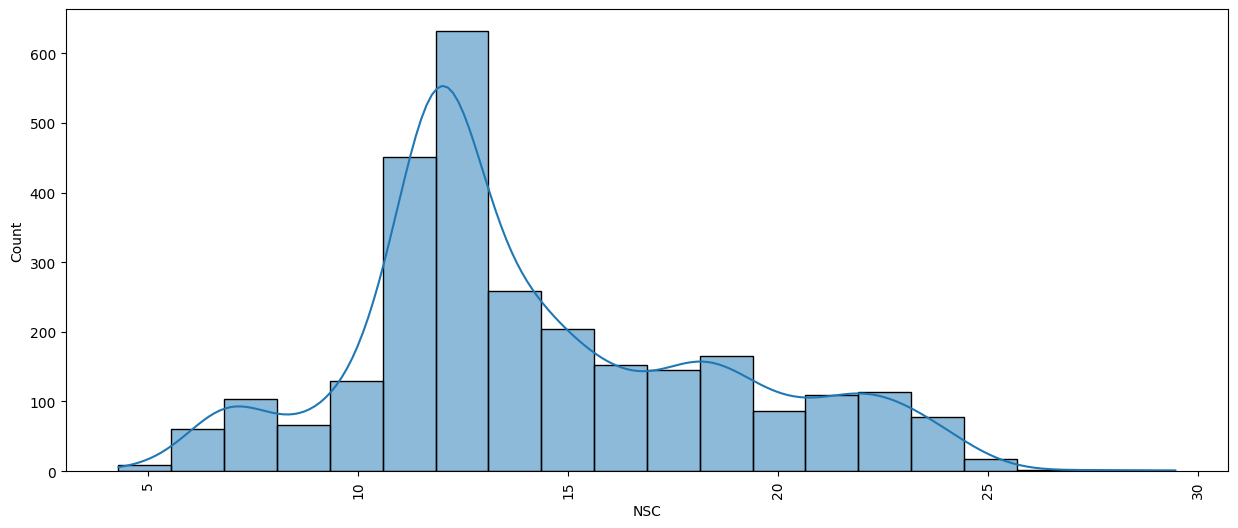

In [32]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

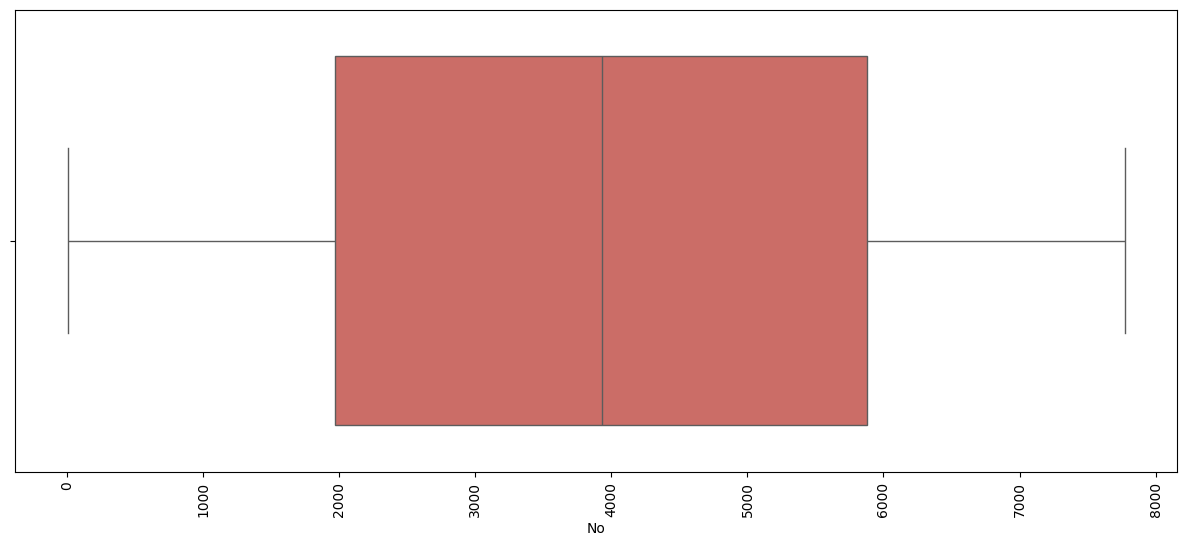

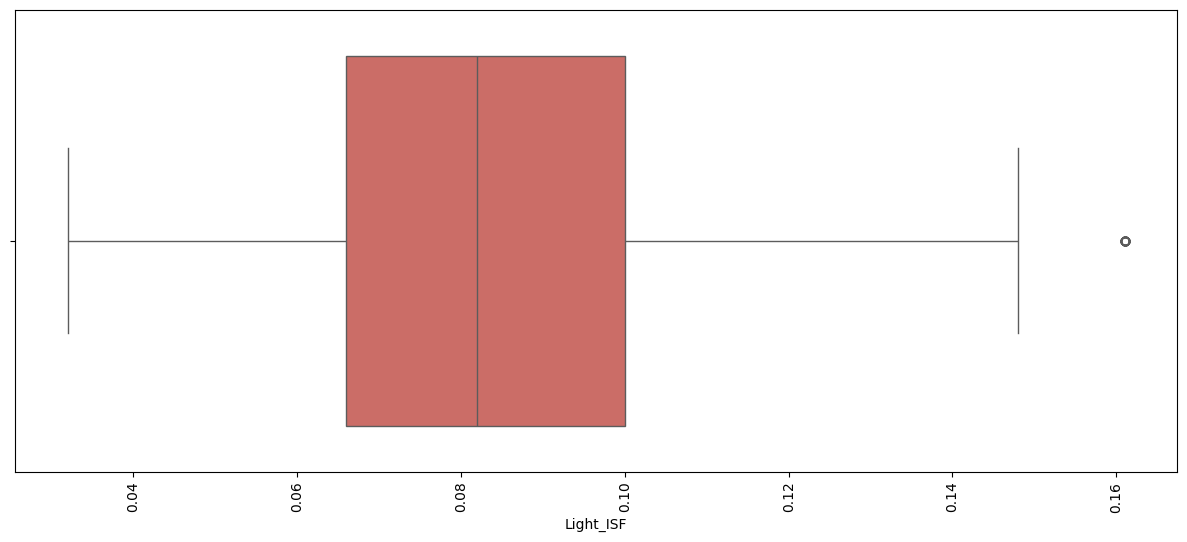

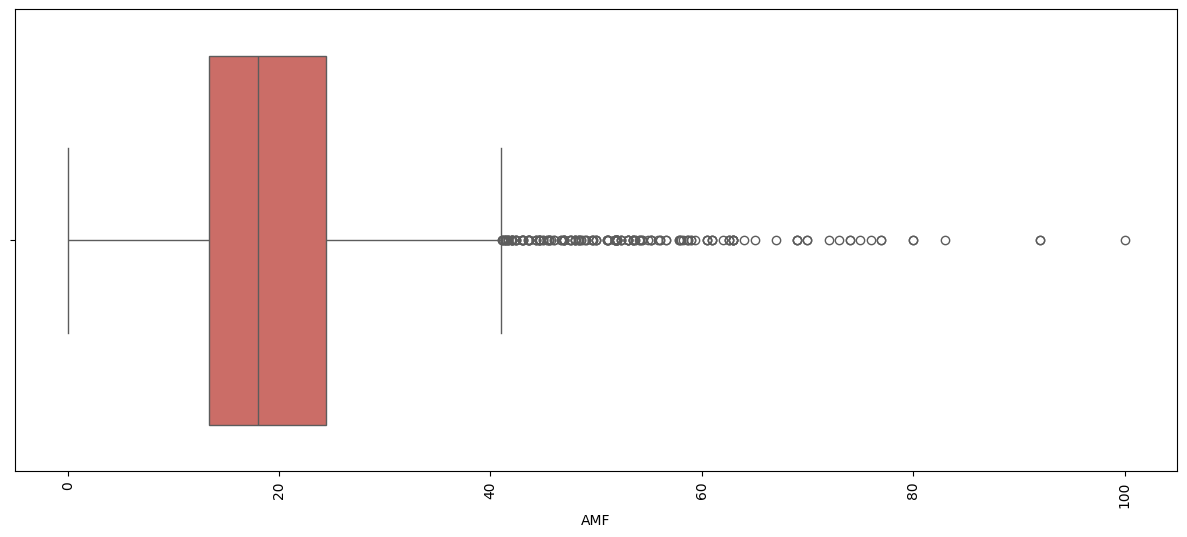

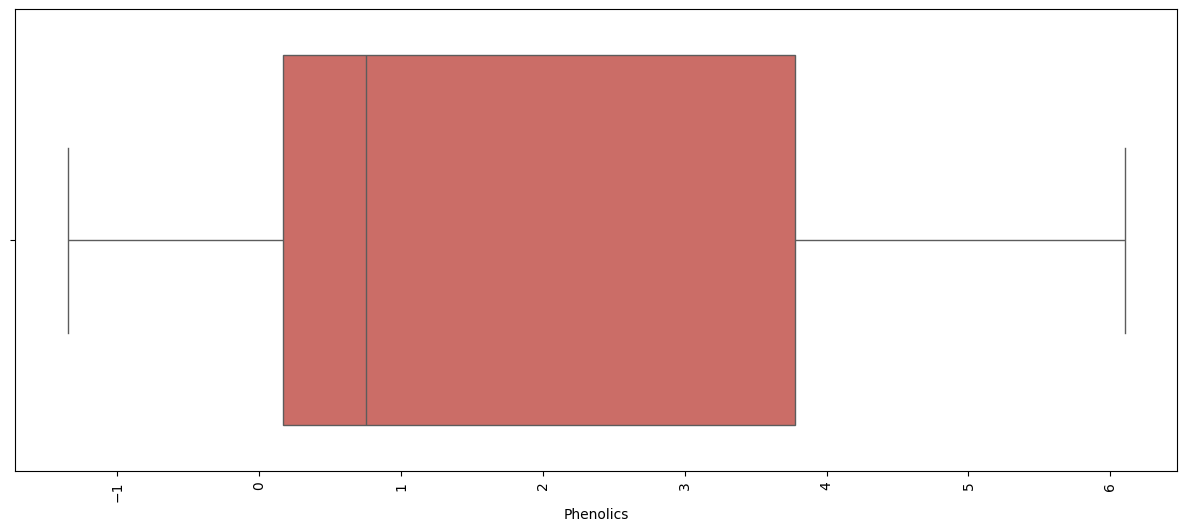

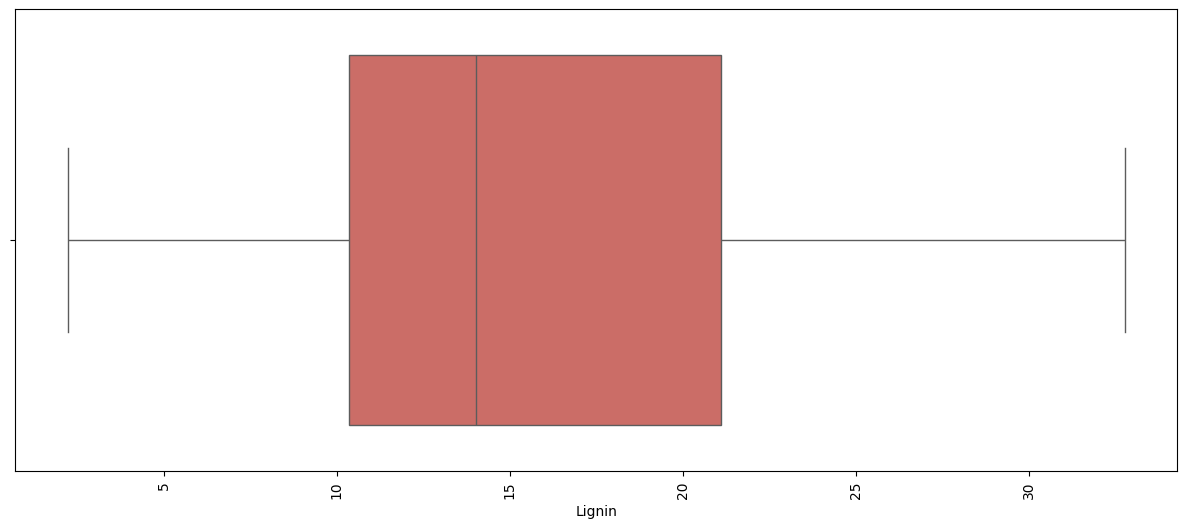

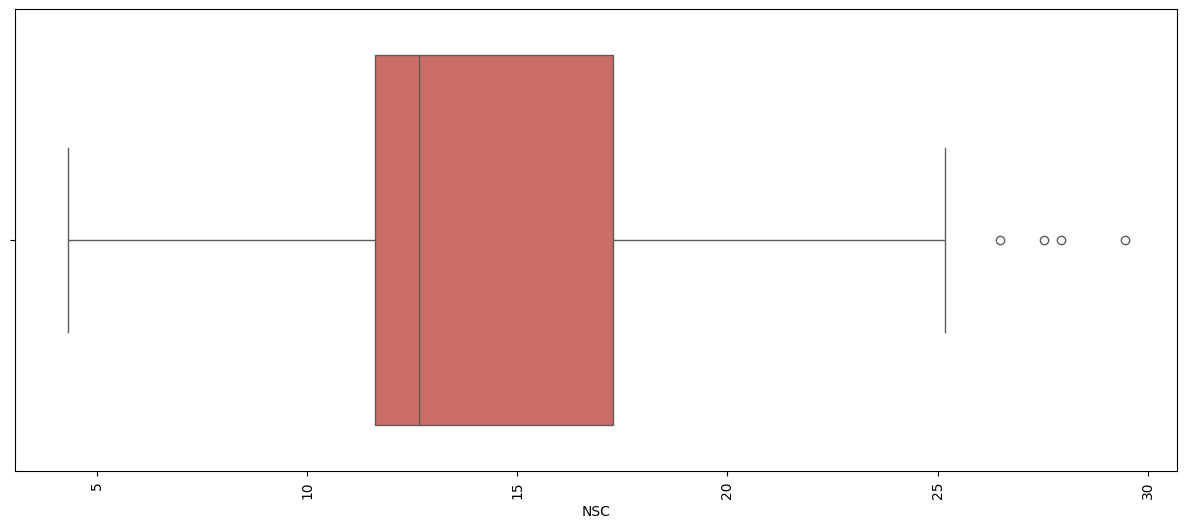

In [33]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

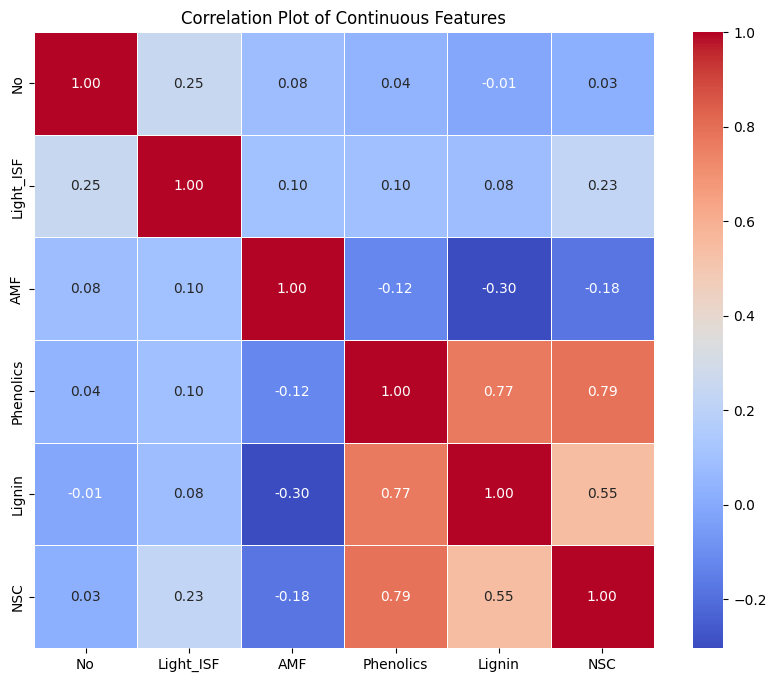

In [34]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [35]:
X = df.drop('Event', axis=1)
y = df['Event']


In [36]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


models = {
    "Linear SVM": LinearSVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Bagged Trees": BaggingClassifier(estimator=DecisionTreeClassifier(),
                                      n_estimators=100, random_state=42)
}


===== Linear SVM =====
Accuracy: 0.8241

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       234
         1.0       0.88      0.80      0.84       323

    accuracy                           0.82       557
   macro avg       0.82      0.83      0.82       557
weighted avg       0.83      0.82      0.83       557



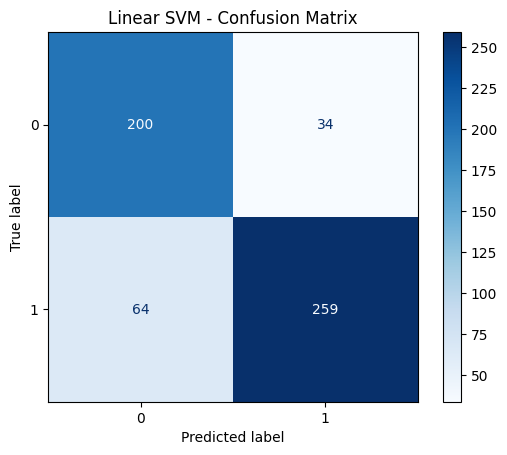


===== Logistic Regression =====
Accuracy: 0.8241

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       234
         1.0       0.88      0.80      0.84       323

    accuracy                           0.82       557
   macro avg       0.82      0.83      0.82       557
weighted avg       0.83      0.82      0.83       557



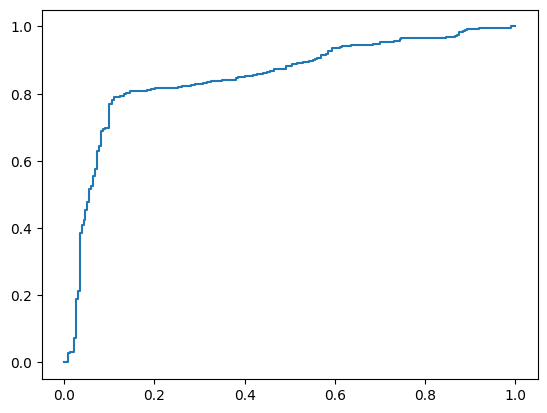

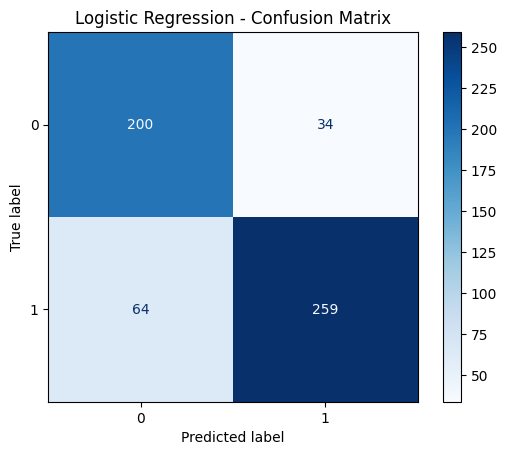


===== Naive Bayes =====
Accuracy: 0.8276

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       234
         1.0       0.89      0.80      0.84       323

    accuracy                           0.83       557
   macro avg       0.82      0.83      0.83       557
weighted avg       0.84      0.83      0.83       557



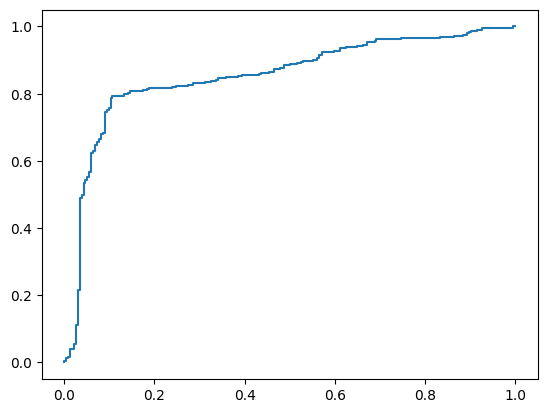

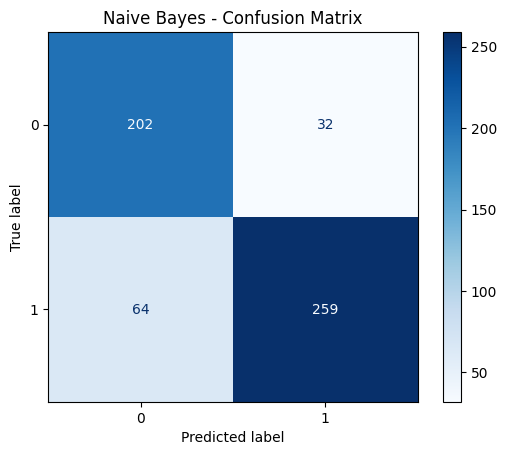


===== Bagged Trees =====
Accuracy: 0.9731

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       234
         1.0       0.98      0.98      0.98       323

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



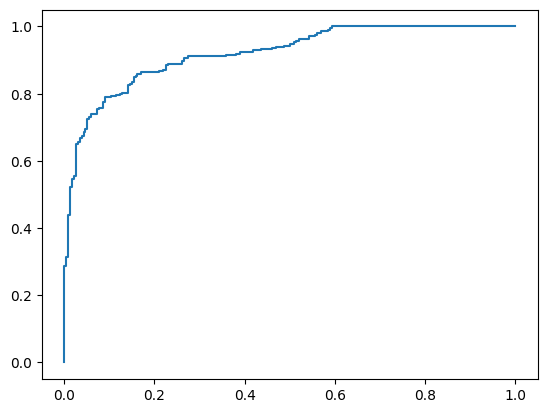

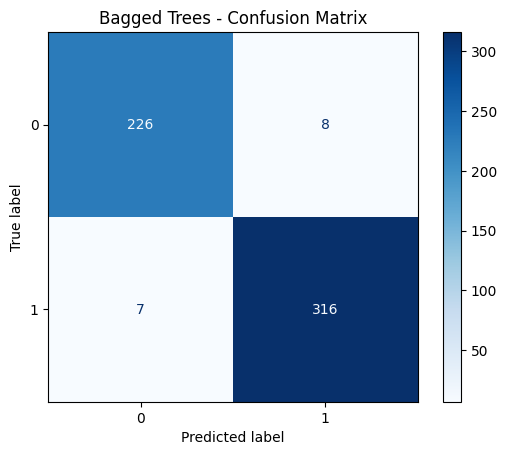

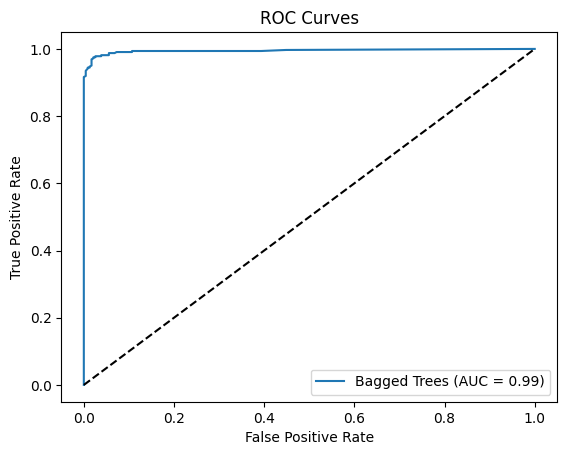

In [48]:
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve)

model_accuracies = {} # Initialize dictionary to store accuracies

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)


    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    model_accuracies[name] = acc * 100 # Store accuracy in the dictionary

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba") or hasattr(model, "decision_function"):
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot ROC for all
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

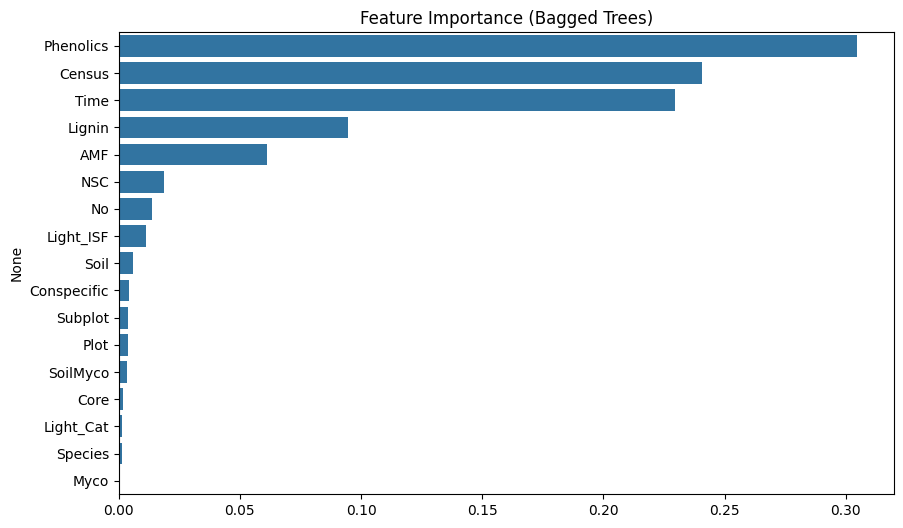

In [50]:
bagged_model = models["Bagged Trees"]

# Access feature importances from fitted estimators and average them
importances = np.mean([estimator.feature_importances_ for estimator in bagged_model.estimators_], axis=0)
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (Bagged Trees)")
plt.show()

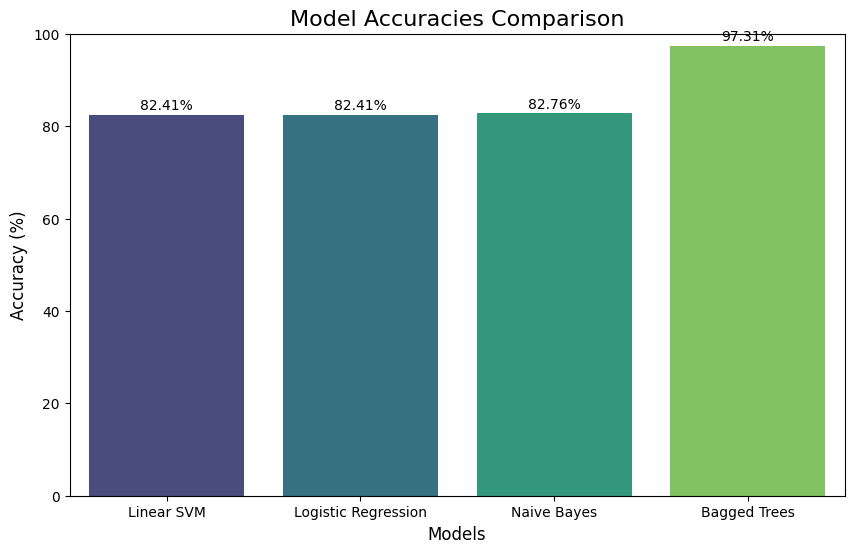

In [51]:
#Accuracy Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.title("Model Accuracies Comparison", fontsize=16)
for index, value in enumerate(model_accuracies.values()):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=10)
plt.ylim(0, 100)
plt.show()

In [52]:
# Save Bagged Trees model separately
bagged_trees_model = models["Bagged Trees"]

import joblib
joblib.dump(bagged_trees_model, "bagged_trees_model.pkl")
joblib.dump(scaler, "scaler.pkl")                # Save the scaler
joblib.dump(le, "label_encoder.pkl")             # Save LabelEncoder for decoding target
joblib.dump(X.columns.tolist(), "feature_names.pkl")  # Save feature names
print("✅ Bagged Trees model and supporting files saved!")


✅ Bagged Trees model and supporting files saved!


In [53]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load saved model and preprocessors
model = joblib.load("bagged_trees_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")
feature_names = joblib.load("feature_names.pkl")

# Streamlit UI
st.title("🌳 Tree Survival Prediction App")
st.write("This app predicts whether a tree will survive based on environmental features using Bagged Trees.")

# Input fields for all features
user_input = {}
for feature in feature_names:
    user_input[feature] = st.number_input(f"Enter {feature}:", value=0.0)

# Convert inputs to DataFrame
input_df = pd.DataFrame([user_input])

# Scale input
input_scaled = scaler.transform(input_df)

# Predict
if st.button("Predict"):
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)

    predicted_class = label_encoder.inverse_transform(prediction)[0]
    confidence = np.max(probability) * 100

    st.success(f"🎯 Predicted Event: **{predicted_class}**")
    st.info(f"Confidence: {confidence:.2f}%")


Writing app.py


In [54]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
